<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2023</p>
<p style="margin: 0; text-align:right;">Complex data in health</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In [10]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

import localization
import separation
import proximity

# 1. Disease modules

- Disease gene associations

In [11]:
dga = pd.read_csv("../datasets/disease_gene.tsv", sep='\t')

dga = dga[dga.diseaseType == 'disease'][['geneSymbol', 'diseaseName']].drop_duplicates()

dga['diseaseName'] = dga['diseaseName'].str.lower()

num_genes = (dga.groupby('diseaseName')
             .agg('count')
             .sort_values(by='geneSymbol')
             .reset_index()
             .rename(columns={'geneSymbol':'count_genes'}))

filtered_dga = dga.merge(num_genes, 
                         on='diseaseName', 
                         how='inner')

cleaned_dga = filtered_dga[filtered_dga.count_genes>10][['geneSymbol', 'diseaseName']].drop_duplicates().reset_index(drop=True)

- PPIs

In [12]:
ppi = pd.read_csv('../datasets/ppi.csv')

ppi = (ppi[['Symbol_A','Symbol_B']]
       .drop_duplicates()
       .dropna())

gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [13]:
def get_disease_module_info(dis_name, gda, ppi):
    
    d = gda[gda.diseaseName == dis_name]
    genes = list(d.geneSymbol.unique())
    genes_in_ppi = [n for n in gppi.nodes if n in genes]
    genes_in_lcc = localization.get_lcc(ppi, genes_in_ppi)
    
    print('Number of disease genes: ',len(genes))
    print('Number of disease genes in the PPI: ',len(genes_in_ppi))
    print('Number of disease genes in the LCC: ',len(genes_in_lcc))
    
    return genes, genes_in_ppi, genes_in_lcc

In [14]:
def plot_disease_module_info(ppi, genes):
    
    sig_dict = localization.get_random_comparison(ppi, genes[1], 1000)
    random_lcc = sig_dict['LCC_list']
    print('Full randomization')
    print('Mean: ',sig_dict['mean'])
    print('Std: ',sig_dict['std'])
    print('z-score: ',sig_dict['z_score'])
    print('p-value: ',sig_dict['p_value'])

    sig_dp_dict = localization.get_random_comparison(ppi, genes[1], 1000, degree_preserving=True)
    random_dp_lcc = sig_dp_dict['LCC_list']
    print('\nDegree preserving randomization')
    print('Mean: ',sig_dp_dict['mean'])
    print('Std: ',sig_dp_dict['std'])
    print('z-score: ',sig_dp_dict['z_score'])
    print('p-value: ',sig_dp_dict['p_value'], '\n')
    
    fig, axs = plt.subplots(1, 2, figsize=(7,3))

    sns.histplot(data=random_lcc,
                 bins=10, 
                 ax=axs[0])
    axs[0].axvline(len(genes[2]), color='r')
    axs[0].set_xlabel('LCC value')
    axs[0].set_ylabel('Count iterations')
    axs[0].set_title('Full randomization')

    sns.histplot(data=random_dp_lcc,
                 bins=10, 
                 ax=axs[1])
    axs[1].axvline(len(genes[2]), color='r')
    axs[1].set_xlabel('LCC value')
    axs[1].set_ylabel('Count iterations')
    axs[1].set_title('Degree preserving randomization')

    plt.tight_layout()
    plt.show()

- Schizophrenia

In [15]:
scz = get_disease_module_info('schizophrenia', cleaned_dga, gppi)

Number of disease genes:  883
Number of disease genes in the PPI:  846
Number of disease genes in the LCC:  683


Full randomization
Mean:  411.209
Std:  34.67335171280677
z-score:  7.838613418489124
p-value:  4.6629367034256575e-15

Degree preserving randomization
Mean:  619.439
Std:  11.732360333709495
z-score:  5.417579940617418
p-value:  6.041114164467842e-08 


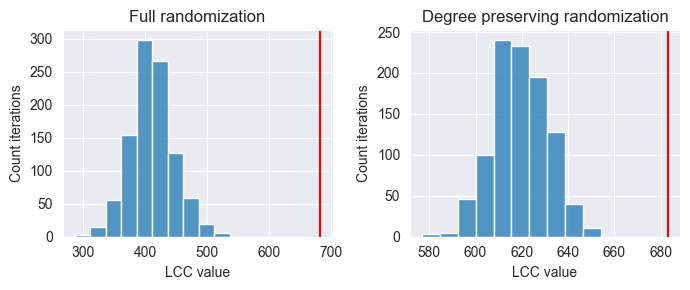

In [16]:
plot_disease_module_info(gppi, scz)

- Autistic Disorder

In [17]:
ad = get_disease_module_info('autistic disorder', cleaned_dga, gppi)

Number of disease genes:  261
Number of disease genes in the PPI:  253
Number of disease genes in the LCC:  118


Full randomization
Mean:  32.176
Std:  18.981860393544146
z-score:  4.521369255733716
p-value:  6.1440903811327274e-06

Degree preserving randomization
Mean:  81.147
Std:  9.133421647991513
z-score:  4.0349609839926925
p-value:  5.461137147766415e-05 


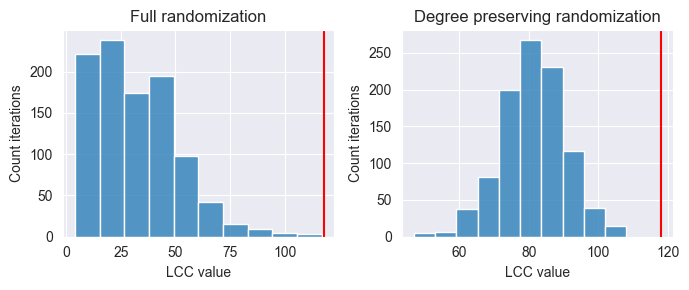

In [18]:
plot_disease_module_info(gppi, ad)

- Obesity

In [19]:
ob = get_disease_module_info('obesity', cleaned_dga, gppi)

Number of disease genes:  205
Number of disease genes in the PPI:  198
Number of disease genes in the LCC:  80


Full randomization
Mean:  17.844
Std:  12.064147877077767
z-score:  5.152125175628708
p-value:  2.57551024285263e-07

Degree preserving randomization
Mean:  52.626
Std:  7.097895744514708
z-score:  3.856635964420128
p-value:  0.00011495816741979858 


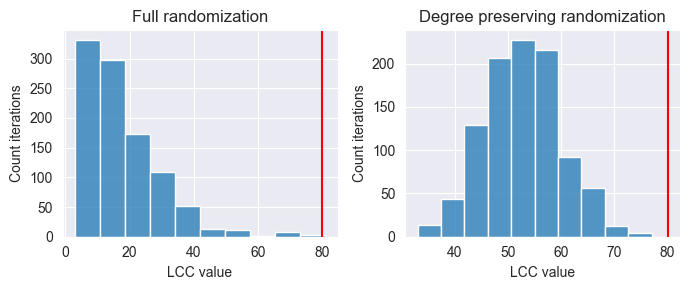

In [20]:
plot_disease_module_info(gppi, ob)

- Hyperlipidemia

In [21]:
hl = get_disease_module_info('hyperlipidemia', cleaned_dga, gppi)

Number of disease genes:  17
Number of disease genes in the PPI:  17
Number of disease genes in the LCC:  5


Full randomization
Mean:  1.229
Std:  0.4904681437157769
z-score:  7.68857274079205
p-value:  1.4876988529977098e-14

Degree preserving randomization
Mean:  1.755
Std:  0.7245515854651068
z-score:  4.478632115499351
p-value:  7.512287070854384e-06 


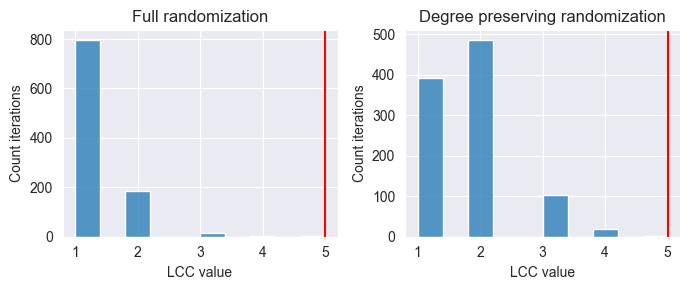

In [22]:
plot_disease_module_info(gppi, hl)

- Rheumatoid Arthritis

In [23]:
ra = get_disease_module_info('rheumatoid arthritis', cleaned_dga, gppi)

Number of disease genes:  174
Number of disease genes in the PPI:  173
Number of disease genes in the LCC:  91


Full randomization
Mean:  13.405
Std:  9.955851294590532
z-score:  7.793909099683007
p-value:  6.439293542825908e-15

Degree preserving randomization
Mean:  42.701
Std:  7.717356995759624
z-score:  6.258489794697634
p-value:  3.8872327579042576e-10 


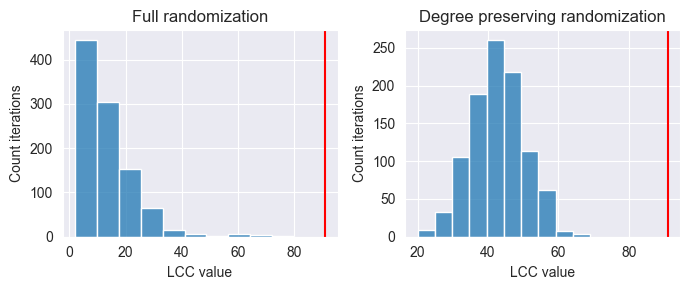

In [24]:
plot_disease_module_info(gppi, ra)

# 2. Disease separation

- To study for example the overlap between diseases and understand better comorbidities

Let's compare Schizophrenia and Autistic Disorder

In [25]:
sab = separation.get_separation(gppi, scz[2], ad[2])

In [26]:
print(sab)

1.2709113607990012


Let's now compare Schizophrenia with Obesity

In [27]:
sab = separation.get_separation(gppi, set(scz[2]), set(ob[2]))

In [28]:
print(sab)

1.4429882044560944


Let's now compare Schizophrenia with Hyperlipidemia

In [29]:
sab = separation.get_separation(gppi, set(scz[2]), set(hl[2]))

In [30]:
print(sab)

2.1061046511627906


Let's now compare Schizophrenia with Rheumatoid Arthritis

In [31]:
sab = separation.get_separation(gppi, set(scz[2]), set(ra[2]))

In [32]:
print(sab)

1.516795865633075


# 3. Disease - drug proximity

- To suggest new drug repurposing opportunities

In [33]:
dt = pd.read_csv('datasets/drug_target.csv')

cleaned_dt = dt[dt.organism=='Humans'][['Gene_Target', 
                                        'Name']].drop_duplicates()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/drug_target.csv'

In [ ]:
def plot_proximity(G, genes, targets, sim):
    
    prox_dict = proximity.get_proximity(G, genes, targets, sim)
    
    prox_obs = prox_dict['proximity']
    random_prox = prox_dict['proximity_list']

    print('Proximity observed: ',prox_obs)
    print('\nMean: ',prox_dict['mean'])
    print('Std: ',prox_dict['std'])
    print('z-score: ',prox_dict['z_score'])
    print('p-value: ',prox_dict['p_value'])


    fig, axs = plt.subplots()
    sns.histplot(data=random_prox,
                 bins=10)
    plt.axvline(prox_obs, color='r')
    plt.xlabel('Proximity value')
    plt.ylabel('Count iterations')
    plt.tight_layout()
    plt.show()

In [ ]:
cleaned_dt[cleaned_dt.Gene_Target.isin(scz[2])][['Name']].drop_duplicates()

In [ ]:
le_t = cleaned_dt[cleaned_dt.Name == 'Lepirudin'].Gene_Target.unique()
print('Lepirudin')
print('\tTargets: ',le_t)

plot_proximity(gppi, 
               set(scz[2]), 
               set(le_t), 
               1000)

In [ ]:
et_t = cleaned_dt[cleaned_dt.Name == 'Etanercept'].Gene_Target.unique()
print('Etanercept')
print('\tTargets: ', et_t)

plot_proximity(gppi, 
               set(scz[2]), 
               set(et_t), 
               1000)